Maximum generations reached. Best Solution: [988, 416, 987] Cost per m^3: 0.12156003757347543


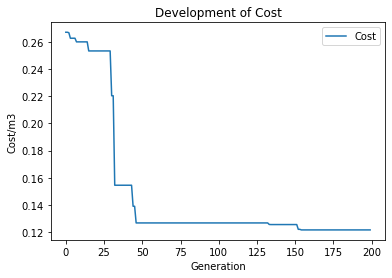

In [31]:
import numpy as np
import random 
import string
import matplotlib.pyplot as plt

# Parameters
population_size = 5
mutation_rate = 0.1
crossover_rate = 0.8
max_generations = 200
fitness_history = []
cost_values_history= []
nMin= 1
nMax= 1000

# Function to generate random dimensions for x, y, z
def generate_random_xyz():
    return [random.randint(nMin, nMax) for _ in range(3)]

# Function to generate initial population
def generate_initial_population(population_size):
    return [generate_random_xyz() for _ in range(population_size)]

# Function to calculate cost per m^3
def calculate_cost(dimensions):
    x, y, z = dimensions
    volume = x * y * z
    cost_per_m3 = calculate_cost_function(dimensions) / volume
    return cost_per_m3
#Price definition 
def calculate_cost_function(dimensions):
    x, y, z = dimensions
    side = (x*y)*4*25
    top= (y*z)*2*10
    return (side+top)

# Function for selection based on roulette wheel selection
def select_parents(population, fitness_values):
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    selected_parents = random.choices(population, weights=None, k=2)
    return selected_parents

# Function for single-point crossover
def crossover(parent1, parent2):
    crossover_point = random.randint(0, len(parent1))
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Function for mutation
def mutate(individual, mutation_rate):
    mutated_individual = [mutate_dimension(dim, mutation_rate) for dim in individual]
    return mutated_individual

# Function to mutate a single dimension
def mutate_dimension(dim, mutation_rate):
    if random.random() < mutation_rate:
        return random.randint(nMin, nMax)  
    return dim

# Main function to run the Genetic Algorithm
def genetic_algorithm():
    population = generate_initial_population(population_size)
    best_solution = None
    best_cost = float('inf')

    for generation in range(max_generations):
        # Calculate cost per m^3 for each individual
        cost_values = [calculate_cost(individual) for individual in population]
        cost_values_history.append(min(cost_values))
        fitness_values = [1 / cost for cost in cost_values]  
        fitness_history.append(min(fitness_values))
        
        # Check for best fit solution
        current_best_cost = min(cost_values)
        if current_best_cost < best_cost:
            best_cost = current_best_cost
            best_solution = population[cost_values.index(current_best_cost)]

        # Selection, Crossover, and Mutation
        new_population = [best_solution] 
        for _ in range((population_size - 1) // 2):
            parent1, parent2 = select_parents(population, fitness_values)
            child1, child2 = parent1, parent2 
            if random.random() < crossover_rate:
                child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        # Replacement
        population = new_population

    else:
        print("Maximum generations reached. Best Solution:", best_solution, "Cost per m^3:", best_cost)

    plt.plot(cost_values_history, label='Cost')
    plt.xlabel('Generation')
    plt.ylabel('Cost/m3')
    plt.title('Development of Cost')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    genetic_algorithm()